In [1]:
!pip install spotipy

In [2]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
cid = ''
secret = ''
user = 'vastava'
scope = 'user-library-read playlist-modify-public playlist-read-private'
redirect_uri = 'http://localhost:8080/'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
def get_features(username, playlist_id, label, artist):
    results = sp.user_playlist_tracks(username, playlist_id)
    songs = results['items']
    
    while results['next']:
        results = sp.next(results)
        songs.extend(results['items'])    
    ids = []
    names = []        
    for i in range(len(songs)):
        if songs[i]['track'] and songs[i]['track']['id'] != None:
            names.append(songs[i]['track']['name'])
            ids.append(songs[i]['track']['id'])
    ids = list(filter(None, ids))
#     names = list(filter(None, names))
    print(len(ids))
    tmp = len(ids)
    print(len(names))
    features = [] 
    for i in range(0,tmp+50,50):        
        audio_features = sp.audio_features(ids[i:i+50])
        for j in range(len(audio_features)):
#             if i+j > tmp:
#                 break
            if i+j <= tmp and audio_features[j] == None:
                print(audio_features[j])
                del names[i+j]
#                 del ids[i+j]            
            features.append(audio_features[j])
    features = list(filter(None, features))
    df = pd.DataFrame(features)
    df[label] = artist
    df['song_name'] = names
    return df

In [5]:
corpse_df = get_features('vastava', '3tUkVoMfTBhNM1RMK93ePi', "artist",'CORPSE')
corpse_df.to_csv('corpse.csv', index=False)

7
7


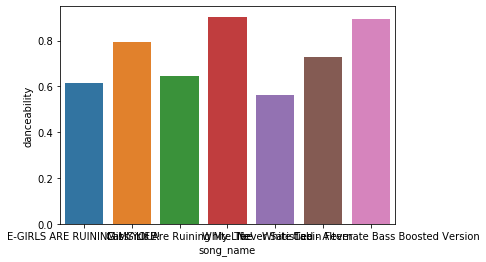

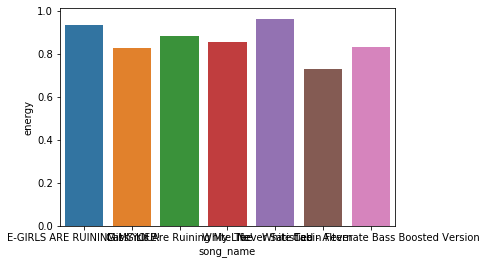

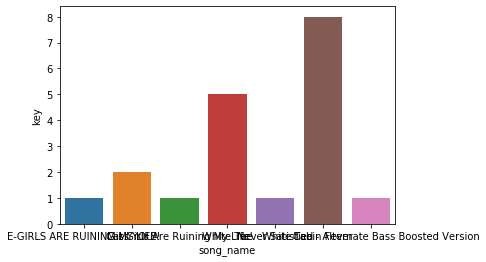

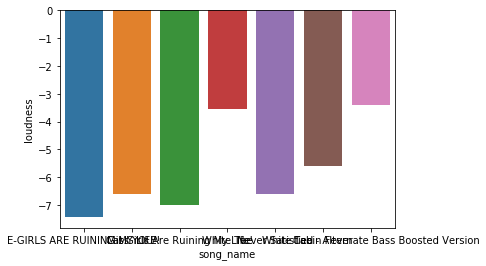

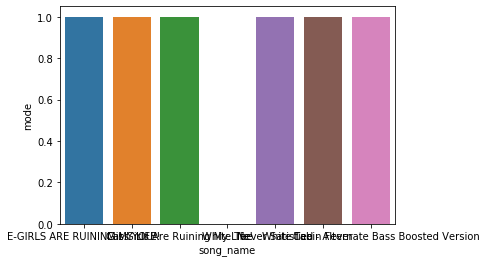

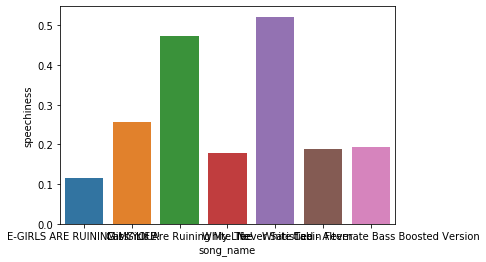

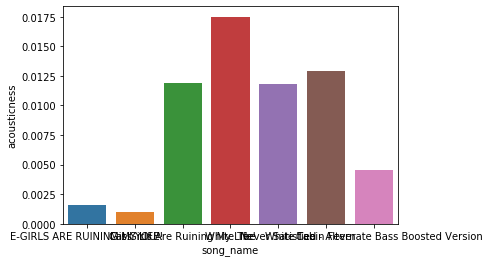

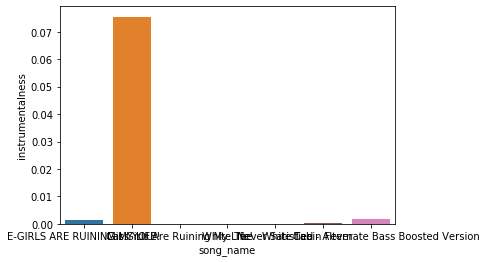

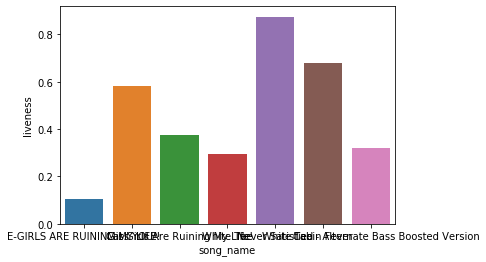

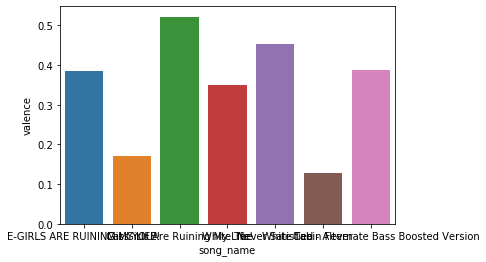

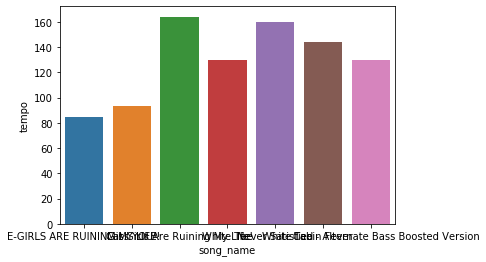

In [30]:
for feature in corpse_df.columns[:11]:
    sns.barplot(corpse_df['song_name'],corpse_df[feature])
    plt.show()

In [31]:
songs = pd.read_csv('edm_songs.csv')
songs

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,title
0,0,0.806,0.950,7,-6.782,1,0.0811,0.000957,0.920000,0.1130,...,127.997,audio_features,5LzAV6KfjN8VhWCedeygfY,spotify:track:5LzAV6KfjN8VhWCedeygfY,https://api.spotify.com/v1/tracks/5LzAV6KfjN8V...,https://api.spotify.com/v1/audio-analysis/5LzA...,197499,4,techhouse,Dirtybird Players
1,1,0.803,0.697,6,-9.479,1,0.0599,0.000130,0.888000,0.3560,...,126.008,audio_features,6nxvhvk9etkPBXXzsLP6re,spotify:track:6nxvhvk9etkPBXXzsLP6re,https://api.spotify.com/v1/tracks/6nxvhvk9etkP...,https://api.spotify.com/v1/audio-analysis/6nxv...,507998,4,techhouse,Tech House Movement
2,2,0.729,0.978,10,-6.645,1,0.0420,0.062300,0.908000,0.0353,...,124.994,audio_features,3TsCb6ueD678XBJDiRrvhr,spotify:track:3TsCb6ueD678XBJDiRrvhr,https://api.spotify.com/v1/tracks/3TsCb6ueD678...,https://api.spotify.com/v1/audio-analysis/3TsC...,206000,4,techhouse,tech house
3,3,0.724,0.792,4,-8.555,0,0.0405,0.019100,0.812000,0.1080,...,124.006,audio_features,6Y0Fy2buEis7bEOlG0QET1,spotify:track:6Y0Fy2buEis7bEOlG0QET1,https://api.spotify.com/v1/tracks/6Y0Fy2buEis7...,https://api.spotify.com/v1/audio-analysis/6Y0F...,199839,4,techhouse,Tech House Bangerz
4,4,0.700,0.898,8,-6.099,1,0.2570,0.053000,0.418000,0.5740,...,125.031,audio_features,4EJI2XGViSQp6WscLKgYDD,spotify:track:4EJI2XGViSQp6WscLKgYDD,https://api.spotify.com/v1/tracks/4EJI2XGViSQp...,https://api.spotify.com/v1/audio-analysis/4EJI...,173861,4,techhouse,tech house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20995,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,...,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,Euphoric Hardstyle
20996,20996,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,...,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,Greatest Hardstyle Playlist
20997,20997,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,...,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,Best of Hardstyle 2020
20998,20998,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,...,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,Euphoric Hardstyle


In [32]:
songs["genre"].value_counts()

psytrance    3000
techhouse    3000
techno       3000
hardstyle    3000
trap         3000
dnb          3000
trance       3000
Name: genre, dtype: int64

In [33]:
get_features('vastava', "19WuHd4MxWLzE1fpMmw4S4", "genre","Dark Trap")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,109.025,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,93.474,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.660,0.604,0,-7.000,1,0.4210,0.247000,0.000128,0.1960,0.4350,155.196,audio_features,5XGeOySEuf66LxJoVqzfeW,spotify:track:5XGeOySEuf66LxJoVqzfeW,https://api.spotify.com/v1/tracks/5XGeOySEuf66...,https://api.spotify.com/v1/audio-analysis/5XGe...,114177,4,Dark Trap,Headfuck
218,0.447,0.652,1,-3.729,1,0.0315,0.043200,0.003710,0.1840,0.0367,117.009,audio_features,16We63cC503m1TMVeZlrvL,spotify:track:16We63cC503m1TMVeZlrvL,https://api.spotify.com/v1/tracks/16We63cC503m...,https://api.spotify.com/v1/audio-analysis/16We...,161178,3,Dark Trap,sleep at night
219,0.278,0.470,2,-15.062,1,0.0456,0.000086,0.002350,0.1480,0.0775,137.961,audio_features,0xWggLjkf1hLZB5cZP874Q,spotify:track:0xWggLjkf1hLZB5cZP874Q,https://api.spotify.com/v1/tracks/0xWggLjkf1hL...,https://api.spotify.com/v1/audio-analysis/0xWg...,202286,5,Dark Trap,Pulling Teeth
220,0.321,0.949,0,-7.297,0,0.5550,0.003340,0.217000,0.5790,0.1960,77.498,audio_features,4OcxBd349UIgErVz81V2TY,spotify:track:4OcxBd349UIgErVz81V2TY,https://api.spotify.com/v1/tracks/4OcxBd349UIg...,https://api.spotify.com/v1/audio-analysis/4Ocx...,174587,4,Dark Trap,AI


In [34]:
playlists = pd.read_csv('Genres spotify - Sheet3.csv')

In [135]:
dfs = []
for index, row in playlists.iterrows():
    print(row["Playlist"])
    temp = get_features('vastava', row["Playlist"], "genre", row["Genre"])
    dfs.append(temp)
dfs

19WuHd4MxWLzE1fpMmw4S4
222
222
6XyR8uzgkSoDzHuOxxRtLH
98
98
37Ij3ofyhvEhFEH8YZMZ2X
1475
1475
07zTlfPpsxeoWdumbkNWMI
855
855
2dClSRLsnptdkDQnpi5H2f
2422
2422
None
3CCC01CIQgca5cu14tgszj
5887
5887
6MrMW8FhdwKI34IiP3fovl
117
117
4cuGsxDEp3w42Q8GVMTEMD
704
704
6IeTmw4eOwpRqQXhR38WHk
195
195
0OzrpLh3mFdRgQluMQtcwU
420
420
67lk0oKI6bXQN4TXhX8uTT
444
444
53PFfeztLLWoqQ6ZUVwxcN
426
426
5zRsrAxoPwL2oOddqsTRNL
328
328
37i9dQZF1DX9wa6XirBPv8
80
80
6fmhLqO9CCMtOrJUeWasGO
299
299
7rxc8Bm5Gu8qbyJgH5ch2P
278
278
3Q97mNoNLZ4RyV9Css4zov
248
248
3vwjBackAZ0Rl9hueMkOwp
259
259
4zkArpBVbsHfR3JT4JW8Yc
266
266
4EH4sHWLCg1e3Et80vBQIP
423
423
5e8YeGZVploxholeRseSlR
299
299
5gs5kjYA88hfTx6X0KPdMo
109
109
5xNWwWNTIHp21TauVPWaPk
231
231
4gdyJJFph3i2oMdpRnCONw
953
953
4iOAnYs1NiKa6QYpNoEsDO
886
886
6GcssIqNfMVPhxQRlkc8hJ
458
458
7rIUjHHI7hlbpXG7VSqfg5
236
236
3e9TiJrTZAJBalNNUOcQZa
618
618
2R78mwwpBnFiidchExPaTo
337
337
27l71FW7GPJXmXyexub5Cq
288
288
5Dy0dtcEUxOwPHNSZck2tj
105
105
397KkHYh060uFfFx5clVr4
264
264
6

[     danceability  energy  key  loudness  mode  speechiness  acousticness  \
 0           0.831   0.814    2    -7.364     1       0.4200      0.059800   
 1           0.719   0.493    8    -7.230     1       0.0794      0.401000   
 2           0.850   0.893    5    -4.783     1       0.0623      0.013800   
 3           0.476   0.781    0    -4.710     1       0.1030      0.023700   
 4           0.798   0.624    2    -7.668     1       0.2930      0.217000   
 ..            ...     ...  ...       ...   ...          ...           ...   
 217         0.660   0.604    0    -7.000     1       0.4210      0.247000   
 218         0.447   0.652    1    -3.729     1       0.0315      0.043200   
 219         0.278   0.470    2   -15.062     1       0.0456      0.000086   
 220         0.321   0.949    0    -7.297     0       0.5550      0.003340   
 221         0.542   0.923    9    -5.924     1       0.3060      0.003340   
 
      instrumentalness  liveness  valence    tempo            

In [136]:
pd.concat(dfs)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,109.025,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,93.474,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,audio_features,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl
1007,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,77.136,audio_features,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94
1008,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,92.080,audio_features,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live
1009,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,0.7330,94.380,audio_features,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,Can't Hold On


In [137]:
dfs.append(songs)

In [139]:
final_data = pd.concat(dfs)
final_data["genre"].value_counts()

Underground Rap    5887
Dark Trap          5071
Hiphop             3319
techhouse          3000
trap               3000
dnb                3000
psytrance          3000
techno             3000
hardstyle          3000
trance             3000
Trap Metal         2634
RnB                2306
Emo                2261
Rap                2070
Pop                 471
Name: genre, dtype: int64

In [142]:
final_data.drop_duplicates()["genre"].value_counts()

Underground Rap    5876
Dark Trap          4580
Hiphop             3028
techhouse          3000
trap               3000
dnb                3000
psytrance          3000
techno             3000
hardstyle          3000
trance             3000
RnB                2099
Trap Metal         1957
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [143]:
final_data = final_data.drop_duplicates()
final_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
20996,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
20997,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
20998,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [150]:
genres = np.unique(final_data["genre"])
genres

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

In [155]:
final_data.to_csv('genres.csv',index=False)